In [1]:
# to connectto Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch.nn as nn
from torch.autograd import Variable as V
import torch
from torch.utils.data import DataLoader,Dataset,TensorDataset
from sklearn.datasets import load_iris
from  sklearn.preprocessing import MinMaxScaler
import numpy
from numpy import save
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd
import time

In [3]:
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go

In [4]:
## Cargando cvs
path = "/content/drive/MyDrive/CURSOS UNSA/Proyecto final de tesis/Avances Proyecto/Tesis_code/"

In [5]:
#Funcion para graficar en 2D y 3D
def plot_2d(component1, component2):
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=False,
            line_width=1,
        
        )
    ))
    fig.update_layout(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    margin=dict( l=100,r=100,b=100,t=100))                 
    fig.layout.template = 'seaborn'
    fig.show()

def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(scene = dict(xaxis_title='Componente 1',
                    yaxis_title='Componente 2',
                    zaxis_title='Componente 3'),
                    margin=dict(l=25,r=25,b=25,t=25))
    fig.layout.template = 'seaborn'
    
    fig.show()

In [6]:
## defining constants
PATH = path+"india_2015_2020.csv"

dataset = pd.read_csv(PATH)
df = dataset.copy()

In [7]:
#Generando 
dx = df.drop(columns=['City','AQI','AQI_Bucket','AQI_range'], inplace=False)
dx.set_index('Date', inplace=True)
x= dx.to_numpy()

# dy = df.drop(columns=['Date','City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI','AQI_Bucket'], inplace=False)
# y=dy.to_numpy()
y = df['AQI_range'].to_numpy()

In [8]:
# Dividiendo los datos en Datos y etiquetas
labels = df.loc[:,'AQI_Bucket'].values

In [9]:
#Funcion para graficar en 2D y 3D
def plot_2d(component1, component2,title):
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=False,
            line_width=1,
        
        )
    ))
    fig.update_layout(xaxis_title='UMAP 1',
                    yaxis_title='UMAP 2',
                    title=title)                 
    fig.layout.template = 'seaborn'
    fig.show()

def plot_3d(component1,component2,component3,title):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        text="{ "+df["City"]+" : " + df["Date"]+" }",
        mode='markers',
        marker=dict(
            size=5,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
    # tight layout
    fig.update_layout(scene = dict(xaxis_title='UMAP 1',
                    yaxis_title='UMAP 2',
                    zaxis_title='UMAP 3'),
                    title=title)
    fig.layout.template = 'seaborn'
    
    fig.show()

#Preparando conjunto de datos

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11054, 9), (4738, 9), (11054,), (4738,))

In [13]:
X_tr.shape, X_valid.shape, X_test.shape

((8843, 9), (2211, 9), (4738, 9))

In [14]:
sc = MinMaxScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

In [15]:
train_df = pd.DataFrame(X_train)
train_df['class'] = y_train

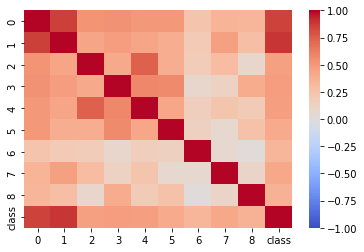

In [16]:
sns.heatmap(train_df.sample(200).corr(), vmin=-1, vmax=1, cmap='coolwarm')

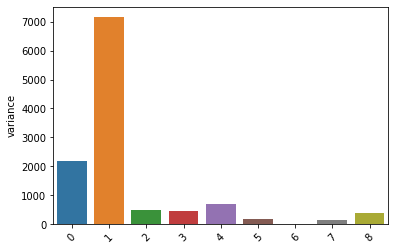

In [17]:
sns.barplot(x=list(train_df.drop('class',1)), y=train_df.drop('class',1).sample(200).var())
plt.ylabel('variance')
plt.xticks(rotation=45);

#Codificador automático lineal incompleto

In [18]:
encoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[9]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(9, input_shape=[3]),
])

autoencoder = keras.models.Sequential([encoder, decoder])

In [19]:
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 30        
                                                                 
 sequential_1 (Sequential)   (None, 9)                 36        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [20]:
time_general =[]
start = time.time()

history = autoencoder.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])
time_general.append(round(time.time() - start,2))


Epoch 1/100
277/277 [==============================] - 2s 6ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 2/100
277/277 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 3/100
277/277 [==============================] - 1s 4ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 4/100
277/277 [==============================] - 1s 3ms/step - loss: 0.0077 - val_loss: 0.0072
Epoch 5/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 6/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 7/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 8/100
277/277 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 9/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 10/100
277/277 [==============================] - 1s 4ms/step - loss: 0.0058 - val_lo

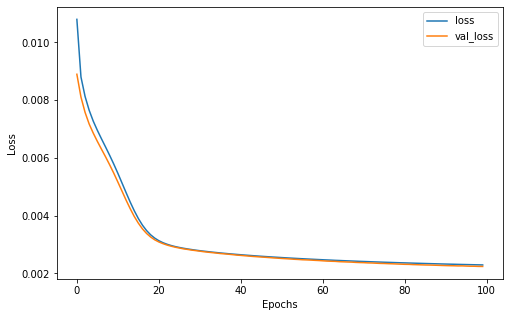

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

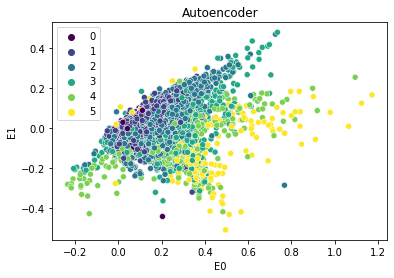

In [22]:
codings = encoder.predict(X_tr_std)
sns.scatterplot(x=codings[:,0], y=codings[:,1], hue=y_tr, palette='viridis')
plt.xlabel(f'E0')
plt.ylabel(f'E1')
plt.title(f'Autoencoder');

#PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
# pca = PCA(n_components=3,svd_solver='auto')
pca = PCA(n_components=3)
scores = pca.fit_transform(X_tr_std) # u

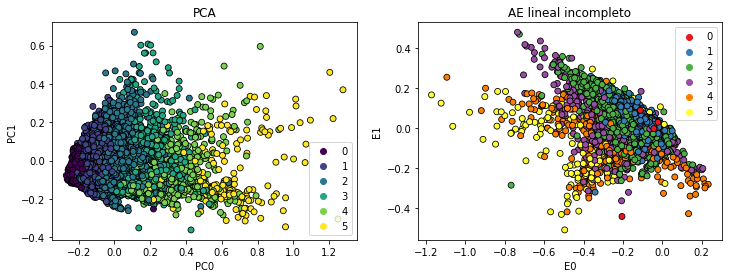

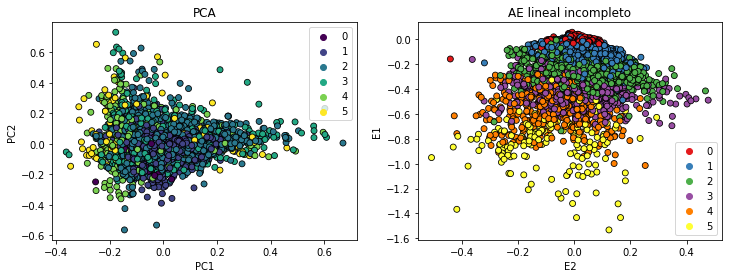

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-codings[:,0], y=codings[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('AE lineal incompleto');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=codings[:,1], y=codings[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('AE lineal incompleto')
plt.xlabel('E2')
plt.ylabel('E1');

In [26]:
codings_train = encoder.predict(X_tr_std)
codings_test = encoder.predict(X_test_std)
scores_train = pca.transform(X_tr_std)
scores_test = pca.transform(X_test_std)

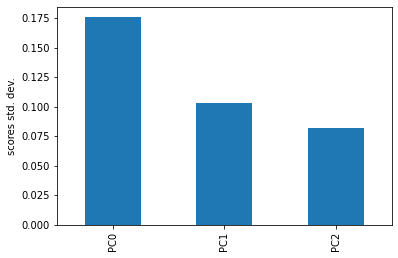

In [27]:
pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).std().plot(kind='bar', color='tab:blue')
plt.ylabel('scores std. dev.');

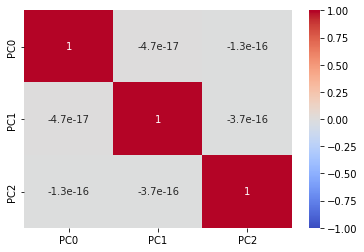

In [28]:
sns.heatmap(pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)


In [29]:
codings_train.shape

(8843, 3)

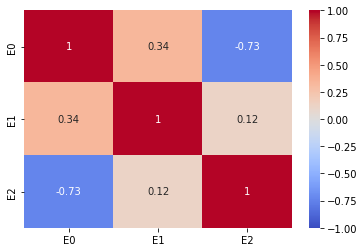

In [30]:
sns.heatmap(pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)


#Predicciones

In [31]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

##Predicción con data original

In [32]:
lrc = LogisticRegressionCV(max_iter=2000)
lrc.fit(X_tr_std,y_tr)
lrc.score(X_tr_std,y_tr),lrc.score(X_test_std,y_test)

(0.7819744430623091, 0.7847192908400169)

In [33]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
rfc.fit(X_tr_std,y_tr)
rfc.score(X_tr_std,y_tr), rfc.score(X_test_std,y_test)

(0.7305213162953749, 0.7370198395947657)

##Predicción con AE

In [34]:
lrc = LogisticRegressionCV(max_iter=1000)
lrc.fit(codings_train,y_tr)
lrc.score(codings_train,y_tr),lrc.score(codings_test,y_test)

(0.6977270157186475, 0.7049387927395525)

##Predicción con PCA

In [35]:
lrc = LogisticRegressionCV(max_iter=1000)
lrc.fit(scores_train,y_tr)
lrc.score(scores_train,y_tr),lrc.score(scores_test,y_test)

(0.7149157525726564, 0.7192908400168848)

In [36]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
rfc.fit(scores_train,y_tr)
rfc.score(scores_train,y_tr), rfc.score(scores_test,y_test)

(0.6362094311885107, 0.6471084845926551)

In [37]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(codings_train,y_tr)
rfc.score(codings_train,y_tr), rfc.score(codings_test,y_test)

(0.6995363564401221, 0.704516673701984)

#Gráfica

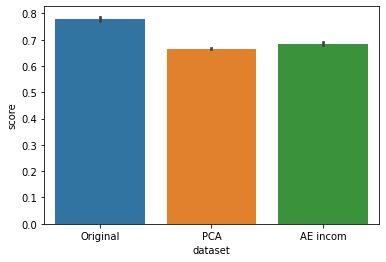

In [38]:
labels = ['Original', 'PCA','AE incom']
modelscores = pd.DataFrame(columns=labels)
modelscores['PCA'] = cross_val_score(rfc, scores_train, y_tr, cv=3)
modelscores['AE incom'] = cross_val_score(rfc, codings_train, y_tr, cv=3)

modelscores['Original'] = cross_val_score(rfc, X_tr_std, y_tr, cv=3)
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
# plt.ylim(0.9,1)

#Codificador-decodificador lineal apilado

In [39]:
st_encoder = keras.models.Sequential([
    keras.layers.Dense(7, input_shape=[9]),
    keras.layers.Dense(3),
])

st_decoder = keras.models.Sequential([
    keras.layers.Dense(7, input_shape=[3]),
    keras.layers.Dense(9),
])

st_autoencoder = keras.models.Sequential([st_encoder, st_decoder])
st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
st_autoencoder.summary()

#Time
start = time.time()
history = st_autoencoder.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=30)],verbose=1)
time_general.append(round(time.time() - start,2))

st_codings_train = st_encoder.predict(X_tr_std)
st_codings_test = st_encoder.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 3)                 94        
                                                                 
 sequential_4 (Sequential)   (None, 9)                 100       
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 0.0100 - val_loss: 0.0074
Epoch 2/100
277/277 [==============================] - 1s 2ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 3/100
277/277 [==============================] - 1s 2ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 4/100
277/277 [==============================] - 1s 2ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 5/100
277/277 [===========================

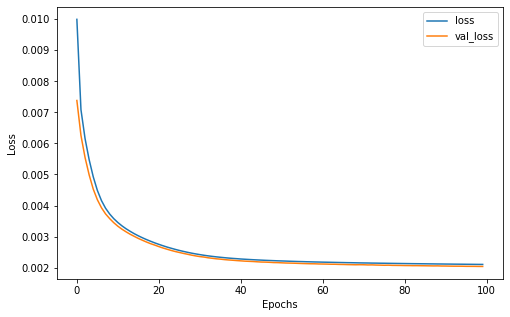

In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

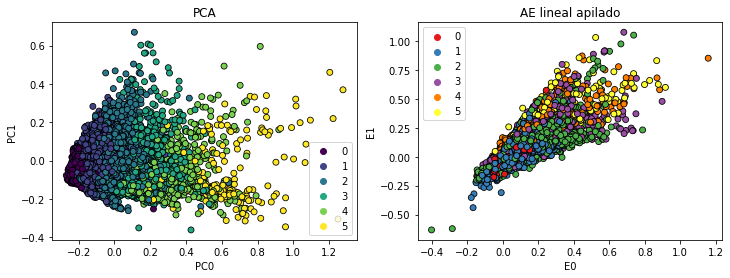

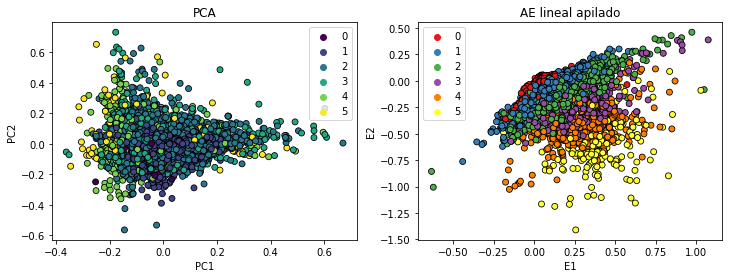

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores_train[:,0],y=scores_train[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-st_codings_train[:,0], y=st_codings_train[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('AE lineal apilado');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores_train[:,1],y=scores_train[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=st_codings_train[:,1], y=st_codings_train[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('AE lineal apilado')
plt.xlabel('E1')
plt.ylabel('E2');

In [42]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
rfc.fit(st_codings_train,y_tr)
rfc.score(st_codings_train,y_tr), rfc.score(st_codings_test,y_test)

(0.6088431527762072, 0.6173490924440692)

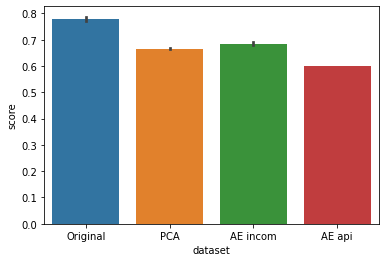

In [43]:
modelscores['AE api'] = cross_val_score(rfc, st_codings_train, y_tr, cv=3, n_jobs=-1)
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
# plt.ylim(0.9,1)

#Codificador-decodificador apilado no lineal

In [44]:
nl_st_encoder = keras.models.Sequential([
    keras.layers.Dense(7, input_shape=[9], activation='relu'),
    keras.layers.Dense(3, activation='selu'),
])

nl_st_decoder = keras.models.Sequential([
    keras.layers.Dense(7, input_shape=[3], activation='selu'),
    keras.layers.Dense(9, activation='relu'),
])

nl_st_autoencoder = keras.models.Sequential([nl_st_encoder, nl_st_decoder])
nl_st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1, decay=1e-4))
nl_st_autoencoder.summary()

#time
start = time.time()
history = nl_st_autoencoder.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)
time_general.append(round(time.time() - start,2))


nl_st_codings_train = nl_st_encoder.predict(X_tr_std)
nl_st_codings_test = nl_st_encoder.predict(X_test_std)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 3)                 94        
                                                                 
 sequential_7 (Sequential)   (None, 9)                 100       
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0069
Epoch 2/100
277/277 [==============================] - 1s 2ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 3/100
277/277 [==============================] - 1s 2ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 4/100
277/277 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 5/100
277/277 [===========================

In [45]:
nl_st_codings_train.shape,nl_st_codings_test.shape

((8843, 3), (4738, 3))

In [46]:
ae = np.concatenate((nl_st_codings_train, nl_st_codings_test), axis=0)

In [47]:
save(path+'ae_3.npy', ae)

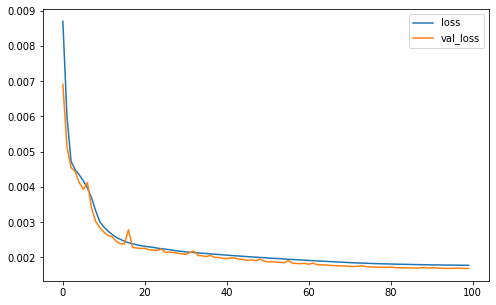

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5));

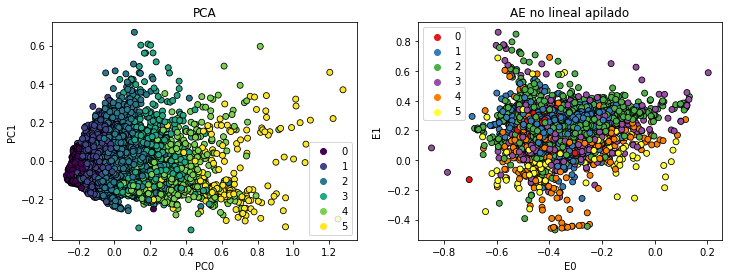

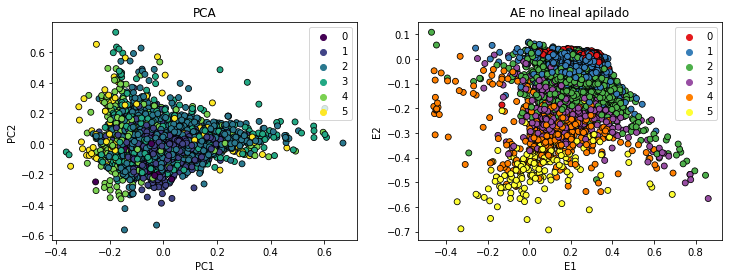

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-nl_st_codings_train[:,0], y=nl_st_codings_train[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('AE no lineal apilado');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=nl_st_codings_train[:,1], y=nl_st_codings_train[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('AE no lineal apilado')
plt.xlabel('E1')
plt.ylabel('E2');

In [50]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(nl_st_codings_train,y_tr)
rfc.score(nl_st_codings_train,y_tr), rfc.score(nl_st_codings_test,y_test)

(0.6754495080854913, 0.6715913887716336)

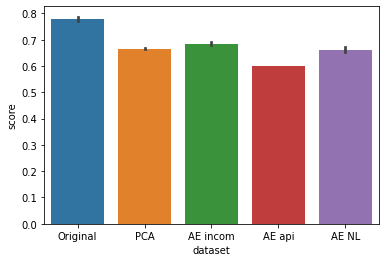

In [51]:
modelscores['AE NL'] = cross_val_score(rfc, nl_st_codings_train, y_tr, cv=3, n_jobs=-1)
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
# plt.ylim(0.9,1)

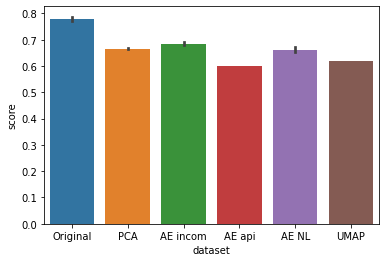

In [52]:
modelscores['UMAP'] = 0.62
sns.barplot(x='dataset', y='score', data = modelscores.melt(value_name='score', var_name='dataset'))
# plt.ylim(0.9,1)

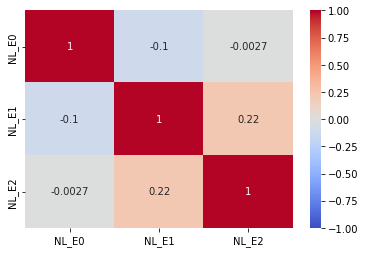

In [53]:
sns.heatmap(pd.DataFrame(nl_st_codings_train, columns=['NL_E'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

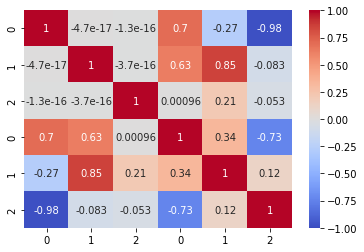

In [54]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(codings)],1).corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

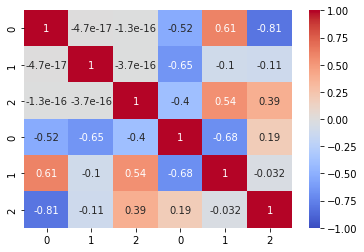

In [55]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(st_codings_train)],1).corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

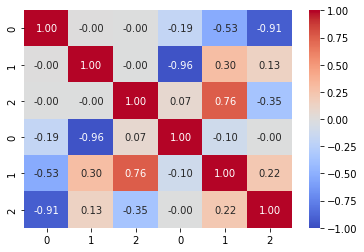

In [56]:
sns.heatmap(pd.concat([pd.DataFrame(scores_train),pd.DataFrame(nl_st_codings_train)],1).corr(), 
            vmin=-1, vmax=1, cmap='coolwarm',annot=True, fmt='.2f')

In [57]:
#Time por cada tipo de autoencoder
tipe_encoder=["simple","Con capas","Capas y f. activación"]
fig = go.Figure(data=go.Scatter(x=tipe_encoder, y=time_general))
fig.update_layout(
    xaxis_title="Tipo de Autoencoder",
    yaxis_title="Tiempo",
)
fig.show()

In [58]:
pd.DataFrame(scores_train).cov()

,0,1,2
0,3.081392e-02,6.748981e-19,-1.668018e-18
1,6.748981e-19,1.058796e-02,-3.264623e-18
2,-1.668018e-18,-3.264623e-18,6.742857e-03
